# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [142]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df= pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

#Merge dataframes into one dataframe
mouse_study_df = study_results_df.merge(mouse_metadata_df, on="Mouse ID")
mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [143]:
# Checking the number of mice.
len(mouse_study_df["Mouse ID"].unique())

249

In [144]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_columns = ["Mouse ID", "Timepoint"]
dup_s = mouse_study_df.duplicated(dup_columns)
dup_s.sum()
dup_mice = mouse_study_df[dup_s]['Mouse ID'].unique()

In [145]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_id = dup_mice[0]
mouse_id
g989_s = mouse_study_df["Mouse ID"] == mouse_id
mouse_study_df[g989_s]
# Delete LATER

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [146]:
dup_mice_s = mouse_study_df["Mouse ID"].isin(dup_mice)
dup_mice_s
mouse_study_df[dup_mice_s]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [147]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study_df[~dup_mice_s]
clean_mouse_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [148]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_study_df["Mouse ID"].unique())

248

## Summary Statistics

In [149]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdev = clean_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

sum_stats_df = pd.DataFrame ({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Standard Deviation": stdev,
    "Standard Error": sem
})

sum_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [150]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_summary_df = clean_mouse_study_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg({"mean", "median","var", "std", "sem"
    })

agg_summary_df

Tumor Volume (mm3)                                          
                            var       mean     median       std       sem
Drug Regimen                                                             
Capomulin             24.947764  40.675741  41.557809  4.994774  0.329346
Ceftamin              39.290177  52.591172  51.776157  6.268188  0.469821
Infubinol             43.128684  52.884795  51.820584  6.567243  0.492236
Ketapril              68.553577  55.235638  53.698743  8.279709  0.603860
Naftisol              66.173479  54.331565  52.509285  8.134708  0.596466
Placebo               61.168083  54.033581  52.288934  7.821003  0.581331
Propriva              43.852013  52.320930  50.446266  6.622085  0.544332
Ramicane              23.486704  40.216745  40.673236  4.846308  0.320955
Stelasyn              59.450562  54.233149  52.431737  7.710419  0.573111
Zoniferol             48.533355  53.236507  51.818479  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Time Points'>

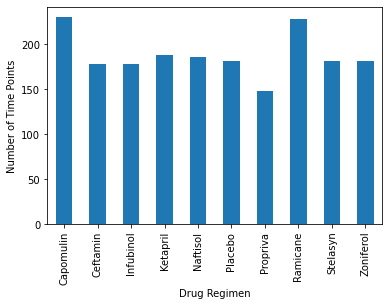

In [151]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint_df = clean_mouse_study_df.groupby("Drug Regimen").count()["Mouse ID"]
timepoint_df.plot(kind = "bar", xlabel = "Drug Regimen", ylabel = "Number of Time Points")

['Capomulin' 'Ketapril' 'Naftisol' 'Infubinol' 'Stelasyn' 'Ramicane'
 'Zoniferol' 'Propriva' 'Placebo' 'Ceftamin']
[230 178 178 188 186 181 148 228 181 182]


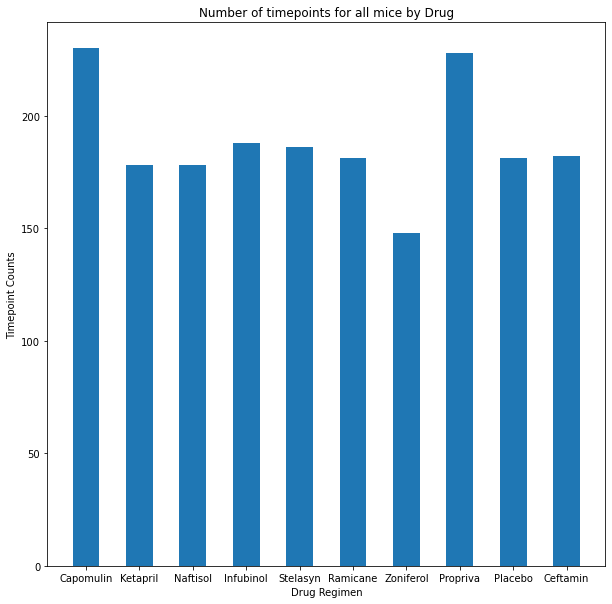

In [152]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoint2 = clean_mouse_study_df.groupby("Drug Regimen").count()["Mouse ID"]
drugNames = clean_mouse_study_df["Drug Regimen"].unique()
y = np.array([timepoint2[i] for i, v in timepoint2.iteritems()])
x = np.array(drugNames)
print (x)
print(y)
plt.figure(figsize = (10,10))
plt.bar(x, y, .5)
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoint Counts')
plt.title("Number of timepoints for all mice by Drug")
plt.show()

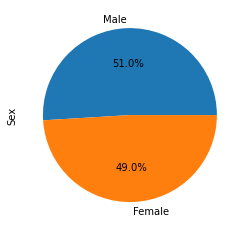

In [153]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = clean_mouse_study_df.Sex.value_counts()
counts.plot(kind="pie", autopct='%1.1f%%')
plt.show()

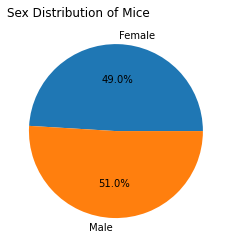

In [154]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

y = np.array([counts.Female, counts.Male])
mylabels = ["Female", "Male"]
plt.title("Sex Distribution of Mice", loc = 'left')
plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [155]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_max_time = clean_mouse_study_df.groupby("Mouse ID").max()["Timepoint"]
mmt_df = pd.DataFrame(mouse_max_time)
mmt_df2= mmt_df.reset_index()
mmt_df2.head(50)

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
5,a401,45
6,a411,45
7,a444,45
8,a457,10
9,a492,45


In [193]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_df = pd.merge(mmt_df2, clean_mouse_study_df, on = ["Mouse ID", "Timepoint"], how = "inner")
rows = len(tumor_df.axes[0])
print (rows)
tumor_df.head(50)

248


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [195]:
tumor_df.loc[4]

Mouse ID                   a366
Timepoint                    30
Tumor Volume (mm3)    63.440686
Metastatic Sites              1
Drug Regimen           Stelasyn
Sex                      Female
Age_months                   16
Weight (g)                   29
Name: 4, dtype: object

In [208]:
# Put treatments into a list for for loop (and later for plot labels)

dreg = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# # Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
#     # Locate the rows which contain mice on each drug and get the tumor volumes
i = 0
for d in dreg:
    final_tumor_vol = tumor_df.loc[tumor_df["Drug Regimen"] == d, 'Tumor Volume (mm3)']
    tumor_vol.append(final_tumor_vol)
i+= 1

print(tumor_vol)
print(len(tumor_vol))

[19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64, 6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
76     33.562402
77     36.374510
91     31.560470
93     36.134852
96     22.050126
119    30.564625
126    31.095335
157    45.220869
158    36.561652
166    37.225650
168    43.419381
177    30.276232
190    40.667713
217    43.166373
235    44.183451
244    30.638696
Name: Tumor Volume (mm3), dtype: float64, 0      67.973419
1      65.525743
11     57.031862
13     66.0830

In [223]:
# add subset 

capo = tumor_vol[0]
rami = tumor_vol[1]
infu = tumor_vol[2]
ceft = tumor_vol[3]

In [235]:
# Determine outliers using upper and lower bounds
lwr_capo = capo.quantile(q=.25)
upr_capo = capo.quantile(q=.75)
lwr_rami = rami.quantile(q=.25)
upr_rami = rami.quantile(q=.75)
lwr_infu = infu.quantile(q=.25)
upr_infu = infu.quantile(q=.75)
lwr_ceft = ceft.quantile(q=.25)
upr_ceft = ceft.quantile(q=.75)

druprq = pd.DataFrame({
    "Capomulin": [upr_capo],
    "Ramicane": [upr_rami],
    "Infubinol": [upr_infu],
    "Ceftamin": [upr_ceft]
})

drlwrq = pd.DataFrame({
    
    "Capomulin": [lwr_capo],
    "Ramicane": [lwr_rami],
    "Infubinol": [lwr_infu],
    "Ceftamin": [lwr_ceft]
})


capo_ulim = upr_capo + 1.5*(upr_capo-lwr_capo)
capo_llim = lwr_capo - 1.5*(upr_capo-lwr_capo)

rami_ulim = upr_rami + 1.5*(upr_rami-lwr_rami)
rami_llim = lwr_rami - 1.5*(upr_rami-lwr_rami)

infu_ulim = upr_infu + 1.5*(upr_infu-lwr_infu)
infu_llim = lwr_infu - 1.5*(upr_infu-lwr_infu)

ceft_ulim = upr_ceft + 1.5*(upr_ceft-lwr_ceft)
ceft_llim = lwr_ceft - 1.5*(upr_ceft-lwr_ceft)

druprb = pd.DataFrame({
    
    "Capomulin": [capo_ulim],
    "Ramicane": [rami_ulim],
    "Infubinol": [infu_ulim],
    "Ceftamin": [ceft_ulim]
    })

drlwrb = pd.DataFrame({
    "Capomulin": [capo_llim],
    "Ramicane": [rami_llim],
    "Infubinol": [infu_llim],
    "Ceftamin": [ceft_llim]
})
print("Capomulin: ", upr_capo, ", ", capo_ulim,", ", capo_llim, ", ", lwr_capo)
print("Ramicane: ", upr_rami, ", ", rami_ulim, ", ", rami_llim, ", ",lwr_rami)
print("Infubinol:", upr_infu, ", ", infu_ulim, ", ",infu_llim,", ", lwr_infu)
print("Ceftamin:", upr_ceft, ", ", ceft_ulim, ", ", ceft_llim, ", ", lwr_ceft)

Capomulin:  40.1592203 ,  51.83201549 ,  20.70456164999999 ,  32.37735684
Ramicane:  40.65900627 ,  54.30681135 ,  17.912664470000003 ,  31.56046955
Infubinol: 65.52574285 ,  82.74144559000001 ,  36.83290494999999 ,  54.04860769
Ceftamin: 64.29983003 ,  87.66645829999999 ,  25.355449580000002 ,  48.72207785


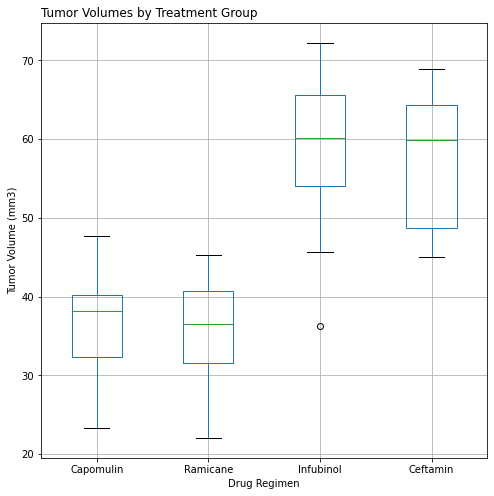

In [225]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

drug_tumor_df = pd.DataFrame({
    "Capomulin": capo,
    "Ramicane": rami,
    "Infubinol": infu,
    "Ceftamin": ceft,
})
plt.figure(figsize = (8,8))
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Tumor Volumes by Treatment Group", loc = 'left')
boxplot = drug_tumor_df.boxplot(column=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
clean_mouse_study_df

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

